In [ ]:
# 导入数据分析和可视化所需的库
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘图
import pandas as pd  # 用于数据处理
import seaborn as sns  # 用于统计数据可视化
import warnings
from scipy import stats  # 用于统计分析

warnings.filterwarnings('ignore')  # 忽略警告信息

In [ ]:
# 定义数据文件路径
train_data_file = '/Users/zhuzijie/Downloads/zhengqi/zhengqi_train.txt'
test_data_file = '/Users/zhuzijie/Downloads/zhengqi/zhengqi_test.txt'
# 读取训练和测试数据集（以制表符分隔）
train_data = pd.read_csv(train_data_file, sep='\t')
test_data = pd.read_csv(test_data_file, sep='\t')
# 显示训练数据的统计摘要
train_data.describe()

In [ ]:
# 为V0特征创建单独的箱线图
fig_test = plt.figure(figsize=(12, 8))  # 设置图形大小
sns.boxplot(x=train_data['V0'], width=0.5)  # 绘制箱线图，宽度为0.5
plt.savefig('./2-特征箱式图.jpg', dpi=300)  # 保存图形为高分辨率图片

In [ ]:
# 为所有特征绘制箱线图
# 获取所有特征（不包括目标变量）
features = train_data.columns.tolist()[:38]  # 确保只包含38个特征
num_features = len(features)

# 计算布局
n_cols = 3
n_rows = (num_features + n_cols - 1) // n_cols  # 向上取整

# 创建子图布局
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2.5))
axes = axes.flatten()  # 将二维数组展平为一维，便于索引

# 设置全局标题
fig.suptitle('各特征的分布情况（箱线图）', fontsize=16, y=0.92)

# 设置字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 统一样式参数
box_props = {
    'boxprops': {'facecolor': '#1f77b4', 'edgecolor': 'black', 'alpha': 0.7},
    'medianprops': {'color': 'red'},
    'whiskerprops': {'color': 'black'},
    'capprops': {'color': 'black'}
}

# 遍历每个特征绘制箱线图
for i, feature in enumerate(features):
    # 在当前子图上绘制箱线图
    sns.boxplot(x=train_data[feature], ax=axes[i], width=0.6, **box_props)

    # 添加网格线
    axes[i].grid(True, linestyle='--', alpha=0.3)

    # 设置标题和轴标签
    axes[i].set_title(feature, fontsize=10)
    axes[i].set_xlabel('值', fontsize=8)
    axes[i].set_ylabel('频率', fontsize=8)
    axes[i].tick_params(axis='both', labelsize=7)

# 隐藏多余的子图
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

# 调整布局
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # 为标题留出空间

# 保存高分辨率图片
plt.savefig('./特征箱线图.png', dpi=300, bbox_inches='tight')

plt.show()

plt.close(fig)

In [ ]:
# 创建单特征分布对比图：训练集与测试集的V0特征
# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 6))

# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 定义一致的颜色方案
train_color = '#E41A1C'  # 红色
test_color = '#377EB8'  # 蓝色

# 绘制核密度估计图
sns.kdeplot(train_data['V0'], color=train_color, fill=True, alpha=0.8, ax=ax, label='训练集')
sns.kdeplot(test_data['V0'], color=test_color, fill=True, alpha=0.8, ax=ax, label='测试集')

# 设置图表标题和标签
ax.set_title('V0特征的分布对比', fontsize=14, pad=10)
ax.set_xlabel('V0值', fontsize=12)
ax.set_ylabel('密度', fontsize=12)

# 添加图例
ax.legend(fontsize=10)

# 优化刻度标签大小
ax.tick_params(axis='both', labelsize=10)

# 添加网格线提高可读性
ax.grid(True, linestyle='--', alpha=0.3)

# 调整布局
plt.tight_layout()

# 保存高分辨率图片
plt.savefig('./V0特征分布对比.jpg', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

plt.close(fig)

In [ ]:
# 创建多个子图比较训练集和测试集的特征分布
# 计算布局参数
dist_cols = 6
dist_rows = (len(test_data.columns) + dist_cols - 1) // dist_cols  # 向上取整确保空间足够

# 创建图形和轴对象数组
fig, axes = plt.subplots(dist_rows, dist_cols, figsize=(4 * dist_cols, 3.5 * dist_rows))
axes = axes.flatten()  # 将二维数组展平为一维，便于索引

# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 设置全局标题
fig.suptitle('特征分布对比: 训练集 vs 测试集', fontsize=16, y=0.92)

# 定义一致的颜色和样式
train_color = '#E41A1C'  # 红色
test_color = '#377EB8'  # 蓝色

# 遍历所有特征
for i, col in enumerate(test_data.columns):
    # 在当前子图上绘制核密度估计
    sns.kdeplot(train_data[col], color=train_color, fill=True, alpha=0.8, ax=axes[i], label='训练集')
    sns.kdeplot(test_data[col], color=test_color, fill=True, alpha=0.8, ax=axes[i], label='测试集')

    # 设置轴标签
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('密度', fontsize=10)
    axes[i].legend(fontsize=8)
    axes[i].tick_params(axis='both', labelsize=8)  # 调整刻度标签大小

# 隐藏多余的子图
for i in range(len(test_data.columns), len(axes)):
    axes[i].set_visible(False)

# 调整子图之间的间距
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # 为标题留出空间

# 保存高分辨率图片
plt.savefig('./特征分布对比.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

In [ ]:
# 特征变量相关性
drop_col_kde = ['V5', 'V9', 'V11', 'V17', 'V22', 'V28']
train_data_drop = train_data.drop(columns=drop_col_kde)
train_corr = train_data_drop.corr()
train_corr

In [ ]:
# 绘制热力图显示特征之间的相关性
fig, ax = plt.subplots(figsize=(20, 16))  # 创建一个大尺寸的图形(20x20英寸)以容纳所有相关性数据
sns.heatmap(train_corr, vmax=.8, square=True, annot=True, ax=ax)  # 绘制相关性热力图，设置最大颜色值为0.8，使用方形单元格，并在每个单元格中显示具体的相关系数值

In [ ]:
# 创建优化的相关性热力图（下三角矩阵）
plt.figure(figsize=(20, 16), clear=True)

# 计算相关性矩阵
corr_matrix = train_data_drop.corr()

# 创建掩码以仅显示下三角矩阵，避免信息重复
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 创建更美观的颜色映射
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # 蓝-白-红配色方案

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 绘制热力图
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=-1,  # 设置颜色范围
    vmax=1,
    center=0,  # 将白色设为0值
    square=True,  # 确保单元格为正方形
    annot=True,  # 显示相关系数
    fmt='.2f',  # 保留两位小数
    linewidths=0.5,  # 设置网格线宽度
    cbar_kws={'shrink': 0.8, 'label': '相关系数'}  # 自定义颜色条
)

# 设置标题
plt.title('特征相关性分析热力图', fontsize=16, pad=10)

# 优化布局
plt.tight_layout()

# 保存高分辨率图片
plt.savefig('./特征相关性分析.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

In [ ]:
# 根据数据分布进行特征删除
train_data.drop(drop_col_kde, axis=1, inplace=True)
test_data.drop(drop_col_kde, axis=1, inplace=True)
train_data.head()

In [ ]:
# 根据相关性系数进行特征筛选
cond = corr_matrix['target'].abs() < 0.1
drop_col_corr = corr_matrix.index[cond]
train_data.drop(drop_col_corr, axis=1, inplace=True)
test_data.drop(drop_col_corr, axis=1, inplace=True)
test_data.tail()

In [ ]:
# 整合训练数据和测试数据
train_data['label'] = 'train'
test_data['label'] = 'test'
all_data = pd.concat([train_data, test_data])
all_data.to_csv('./processed_zhengqi_data.csv', index=False)

In [ ]:
# 特征归一化
columns = list(all_data.columns)
# 删除标签列索引
columns.remove('label')
# 删除目标值
columns.remove('target')
all_data[columns].head()

In [ ]:
# 定义归一化
def norm_min_max(col):
    return (col - col.min()) / (col.max() - col.min())


all_data[columns] = all_data[columns].apply(norm_min_max, axis=0)
all_data.describe()

In [ ]:
# 获取训练数据
cond = all_data['label'] == 'train'
train_data = all_data[cond]
train_data.drop(labels='label', axis=1, inplace=True)

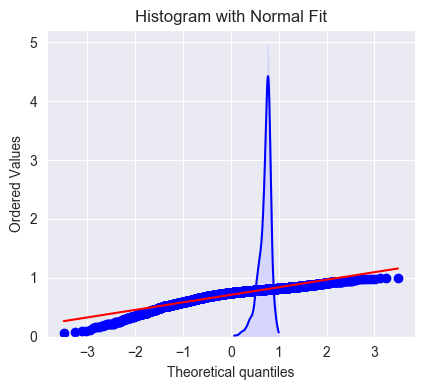